In [1]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = "C:\\Users\\oreso\\Downloads\\Machine Learning\\birthweight_low.xlsx"


# reading the file into Python
birthweight = pd.read_excel(io = file)


# checking the file
birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# dropping unnamed columns, they are not revelant
birthweight.drop(birthweight.iloc[:,18:], inplace = True, axis = 1)
birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [3]:
# using .shape to view (ROWS, COLUMNS)
birthweight.shape

(196, 18)

In [4]:
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [5]:
# looping to print column names one by one
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [6]:
# check for skewness along the index axis
birthweight.skew(axis = 0, skipna = True)

mage      0.922193
meduc    -0.069307
monpre    2.031858
npvis     2.214143
fage      1.120425
feduc    -1.308728
omaps    -2.641176
fmaps    -2.551277
cigs      0.031881
drink     0.234876
male     -0.206738
mwhte     1.041790
mblck     0.486607
moth      0.648090
fwhte     0.648090
fblck     0.672052
foth      0.821757
bwght    -0.659832
dtype: float64

In [7]:
# log transforming monpre and saving it to the dataset
birthweight['log_monpre'] = np.log(birthweight['monpre'])


# log transforming npvis and saving it to the dataset
birthweight['log_npvis'] = np.log(birthweight['npvis'])

# log transforming fage and saving it to the dataset
birthweight['log_fage'] = np.log(birthweight['fage'])


# log transforming feduc and saving it to the dataset
birthweight['log_feduc'] = np.log(birthweight['feduc'])
                                  
                                  
# log transforming omaps and saving it to the dataset
birthweight['log_omaps'] = np.log(birthweight['omaps'])


# log transforming fmaps and saving it to the dataset
birthweight['log_fmaps'] = np.log(birthweight['fmaps'])


# log transforming bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

In [8]:
# check for skewness along the index axis
birthweight.skew(axis = 0, skipna = True)

mage          0.922193
meduc        -0.069307
monpre        2.031858
npvis         2.214143
fage          1.120425
feduc        -1.308728
omaps        -2.641176
fmaps        -2.551277
cigs          0.031881
drink         0.234876
male         -0.206738
mwhte         1.041790
mblck         0.486607
moth          0.648090
fwhte         0.648090
fblck         0.672052
foth          0.821757
bwght        -0.659832
log_monpre    0.300346
log_npvis    -0.717041
log_fage      0.351215
log_feduc    -5.825816
log_omaps    -3.431102
log_fmaps    -3.481541
log_bwght    -2.271851
dtype: float64

In [9]:
# method chaining!
birthweight.isnull().any (axis = 0)

mage          False
meduc          True
monpre        False
npvis          True
fage          False
feduc          True
omaps         False
fmaps         False
cigs          False
drink         False
male          False
mwhte         False
mblck         False
moth          False
fwhte         False
fblck         False
foth          False
bwght         False
log_monpre    False
log_npvis      True
log_fage      False
log_feduc      True
log_omaps     False
log_fmaps     False
log_bwght     False
dtype: bool

In [10]:
# method chaining!
birthweight.isnull().sum(axis = 0) .sum (axis =0 )

23

In [11]:
# creating missing value flags
birthweight['m_meduc'] = birthweight['meduc'].isnull().astype(int)
birthweight['m_npvis'] = birthweight['npvis'].isnull().astype(int)
birthweight['m_feduc'] = birthweight['feduc'].isnull().astype(int)
birthweight['m_log_npvis'] = birthweight['log_npvis'].isnull().astype(int)
birthweight['m_log_feduc'] = birthweight['log_feduc'].isnull().astype(int)

In [12]:
print(f"""
Original Missing Value Counts:
------------------------------
{birthweight.isnull().sum(axis = 0)}


Sums of Missing Value Flags
--------------------------
{birthweight.iloc[ : , -3: ].sum(axis = 0)}

""")


Original Missing Value Counts:
------------------------------
mage           0
meduc          3
monpre         0
npvis          3
fage           0
feduc          7
omaps          0
fmaps          0
cigs           0
drink          0
male           0
mwhte          0
mblck          0
moth           0
fwhte          0
fblck          0
foth           0
bwght          0
log_monpre     0
log_npvis      3
log_fage       0
log_feduc      7
log_omaps      0
log_fmaps      0
log_bwght      0
m_meduc        0
m_npvis        0
m_feduc        0
m_log_npvis    0
m_log_feduc    0
dtype: int64


Sums of Missing Value Flags
--------------------------
m_feduc        7
m_log_npvis    3
m_log_feduc    7
dtype: int64




In [13]:
birthweight.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_monpre,log_npvis,log_fage,log_feduc,log_omaps,log_fmaps,log_bwght,m_meduc,m_npvis,m_feduc,m_log_npvis,m_log_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697,1.609438,0.693147,4.127134,NaN,1.386294,1.945910,6.546785,1,0,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,1.098612,2.302585,4.110874,2.397895,1.386294,1.791759,7.162397,0,0,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,1.098612,1.791759,3.828641,2.484907,0.693147,1.945910,7.306531,0,0,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0.000000,2.079442,3.871201,2.772589,1.945910,2.079442,7.450080,0,0,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,1.386294,1.791759,3.663562,2.484907,0.693147,2.197225,7.578657,0,0,0,0,0
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984,1.386294,2.079442,3.688879,2.079442,1.386294,2.197225,7.592870,0,0,0,0,0
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050,0.693147,2.484907,3.828641,2.484907,2.197225,2.197225,7.625595,0,0,0,0,0
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068,1.386294,1.945910,3.931826,2.397895,2.197225,2.079442,7.634337,0,0,0,0,0
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148,0.000000,2.197225,3.970292,2.639057,2.079442,2.197225,7.672292,0,0,0,0,0
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180,0.693147,2.484907,4.110874,2.772589,2.197225,2.197225,7.687080,0,0,0,0,0


In [14]:
birthweight['mv_sum'] = birthweight.iloc[ :, -5:] . sum(axis = 1)

birthweight['mv_sum'] = birthweight['meduc'] + \
                     birthweight['npvis'] + \
                     birthweight['feduc'] + \
                     birthweight['log_npvis'] + \
                     birthweight['log_feduc']
# checking results
print(f"""

Number of Missing Values per Observation (Pct)
----------------------------------------------
{(birthweight['mv_sum'].value_counts(normalize = True,
                                  sort      = True,
                                  ascending = True)*100).round(2)}
""")




Number of Missing Values per Observation (Pct)
----------------------------------------------
42.962845     0.54
52.472271     0.54
40.941642     0.54
53.768321     0.54
45.036953     0.54
41.430817     0.54
41.779123     0.54
55.605802     0.54
38.700480     0.54
39.969813     0.54
49.545177     0.54
39.787492     0.54
59.886104     0.54
27.025352     0.54
62.857933     0.54
46.036953     0.54
53.472271     0.54
36.700480     0.54
29.583519     0.54
38.430817     0.54
53.545177     0.54
47.123964     0.54
55.777652     0.54
44.852030     0.54
48.433987     0.54
44.123964     0.54
70.234411     0.54
49.347108     0.54
28.496508     0.54
55.662960     0.54
49.416100     0.54
36.787492     0.54
32.248495     0.54
47.030438     0.54
35.174387     0.54
35.343805     0.54
46.135798     0.54
50.318120     0.54
45.273000     0.54
62.991465     0.54
45.912655     0.54
51.347108     0.54
42.787492     0.54
31.158883     0.54
37.836282     0.54
42.049856     0.54
51.605802     0.54
55.768321  

In [15]:
# impute missing values for monpre

# soft coding MEAN for meduc
meduc_mean = birthweight['meduc'].mean()


# filling meduc NAs with MEAN
birthweight['meduc'].fillna(value = meduc_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['meduc'].isnull().any())

# soft coding MEAN for npvis
npvis_mean = birthweight['npvis'].mean()


# filling npvis NAs with MEAN
birthweight['npvis'].fillna(value = npvis_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['npvis'].isnull().any())


# soft coding MEAN for feduc
feduc_mean = birthweight['feduc'].mean()


# filling feduc NAs with MEAN
birthweight['feduc'].fillna(value = feduc_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['feduc'].isnull().any())


# soft coding MEAN for log_npvis
log_npvis_mean = birthweight['log_npvis'].mean()


# filling log_npvis NAs with MEAN
birthweight['log_npvis'].fillna(value = log_npvis_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['log_npvis'].isnull().any())


# soft coding MEAN for log_feduc
log_feduc_mean = birthweight['log_feduc'].mean()


# filling log_feduc NAs with MEAN
birthweight['log_feduc'].fillna(value = log_feduc_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['log_feduc'].isnull().any())


# soft coding MEAN for mv_sum
mv_sum_mean = birthweight['mv_sum'].mean()


# filling mv_sum NAs with MEAN
birthweight['mv_sum'].fillna(value = mv_sum_mean,
                         inplace = True)

# checking to make sure NAs are filled in
print(birthweight['mv_sum'].isnull().any())

False
False
False
False
False
False


In [16]:
print(birthweight.isnull().any())

mage           False
meduc          False
monpre         False
npvis          False
fage           False
feduc          False
omaps          False
fmaps          False
cigs           False
drink          False
male           False
mwhte          False
mblck          False
moth           False
fwhte          False
fblck          False
foth           False
bwght          False
log_monpre     False
log_npvis      False
log_fage       False
log_feduc      False
log_omaps      False
log_fmaps      False
log_bwght      False
m_meduc        False
m_npvis        False
m_feduc        False
m_log_npvis    False
m_log_feduc    False
mv_sum         False
dtype: bool


In [17]:
# information about each variable
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mage         196 non-null    int64  
 1   meduc        196 non-null    float64
 2   monpre       196 non-null    int64  
 3   npvis        196 non-null    float64
 4   fage         196 non-null    int64  
 5   feduc        196 non-null    float64
 6   omaps        196 non-null    int64  
 7   fmaps        196 non-null    int64  
 8   cigs         196 non-null    int64  
 9   drink        196 non-null    int64  
 10  male         196 non-null    int64  
 11  mwhte        196 non-null    int64  
 12  mblck        196 non-null    int64  
 13  moth         196 non-null    int64  
 14  fwhte        196 non-null    int64  
 15  fblck        196 non-null    int64  
 16  foth         196 non-null    int64  
 17  bwght        196 non-null    int64  
 18  log_monpre   196 non-null    float64
 19  log_npvi

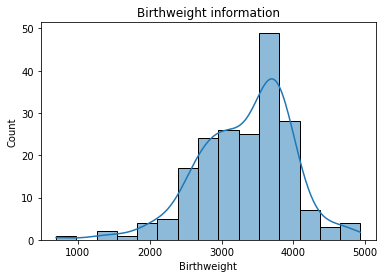

In [18]:
# developing a histogram using HISTPLOT
sns.histplot(data  = birthweight,
            x     = "bwght",
            kde    = True)



# title and axis labels
plt.title(label   = "Birthweight information")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [19]:
# descriptive statistics for numeric data
birthweight.describe(include = 'number').round (decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_monpre,log_npvis,log_fage,log_feduc,log_omaps,log_fmaps,log_bwght,m_meduc,m_npvis,m_feduc,m_log_npvis,m_log_feduc,mv_sum
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,0.72,2.39,3.65,2.60,2.07,2.19,8.09,0.02,0.02,0.04,0.02,0.04,44.50
std,10.25,2.04,1.36,4.23,8.98,2.59,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.50,0.35,0.22,0.31,0.30,0.08,0.23,0.12,0.12,0.19,0.12,0.19,6.47
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,0.00,0.69,3.14,0.00,0.69,1.61,6.55,0.00,0.00,0.00,0.00,0.00,22.08
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,0.69,2.30,3.55,2.48,2.08,2.20,7.98,0.00,0.00,0.00,0.00,0.00,40.58
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,0.69,2.48,3.64,2.64,2.20,2.20,8.15,0.00,0.00,0.00,0.00,0.00,44.68
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,1.10,2.48,3.76,2.77,2.20,2.20,8.23,0.00,0.00,0.00,0.00,0.00,49.26
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,2.08,3.56,4.29,2.83,2.30,2.30,8.50,1.00,1.00,1.00,1.00,1.00,70.23


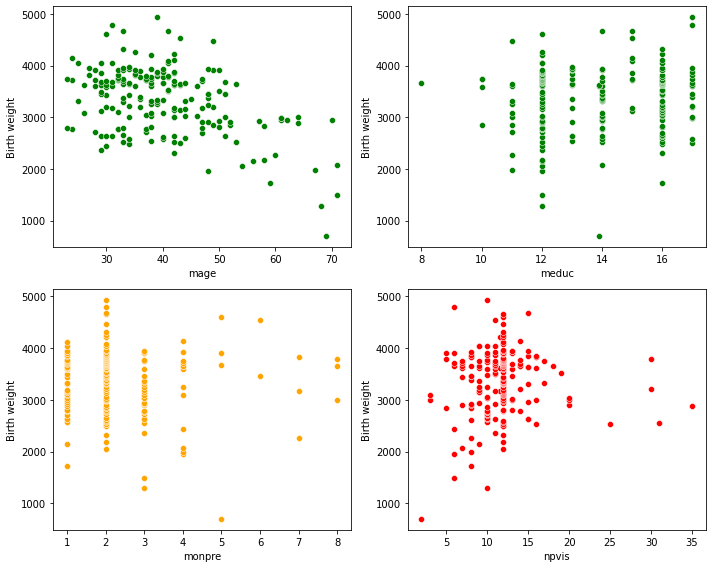

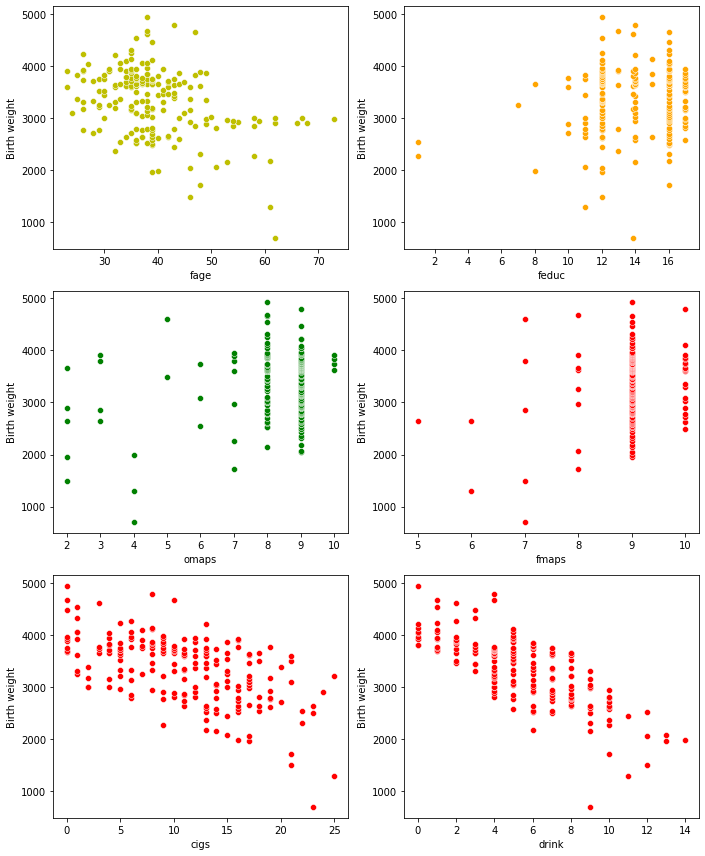

In [20]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'mage')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['monpre'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'monpre')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['npvis'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'npvis')
plt.ylabel(ylabel = 'Birth weight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'fage')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'feduc')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birthweight['omaps'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'omaps')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = birthweight['fmaps'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'fmaps')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = birthweight['cigs'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'cigs')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 6)
sns.scatterplot(x = birthweight['drink'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'Birth weight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [21]:
# creating a list of continuous features (including bwght)
continuous_data = ['bwght' ,'mage', 'meduc','fage','feduc','omaps','fmaps', 'm_meduc', 'm_feduc']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthweight_corr.loc[ : ,"bwght"].round(decimals = 2).sort_values(ascending = False,)
                                                

bwght      1.00
omaps      0.25
fmaps      0.25
feduc      0.13
meduc      0.09
m_feduc   -0.00
m_meduc   -0.13
fage      -0.40
mage      -0.46
Name: bwght, dtype: float64

In [22]:
# creating a list of interval/count features (including bwght)
interval_count = ['bwght','cigs','npvis','drink', 'm_npvis']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[interval_count].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthweight_corr.loc[ : ,"bwght"].round(decimals = 2).sort_values(ascending = False,)

bwght      1.00
npvis      0.06
m_npvis    0.06
cigs      -0.57
drink     -0.74
Name: bwght, dtype: float64

In [23]:
# creating a list of categorical features (including bwght)
categorical_other = ['bwght', 'monpre' ,'npvis', 'male','mwhte','mblck', 'fwhte', 'fblck']

# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[categorical_other].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
birthweight_corr.loc[ : ,"bwght"].round(decimals = 2).sort_values(ascending = False,)

bwght     1.00
mblck     0.13
fblck     0.12
male      0.11
npvis     0.06
fwhte    -0.04
monpre   -0.05
mwhte    -0.11
Name: bwght, dtype: float64

In [24]:
# preparing explanatory variable data
birthweight_data   = birthweight.drop(['bwght', 'log_bwght'],
                               axis = 1)


# preparing response variables
birthweight_target = birthweight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 29)
y-side: (147,)


Testing Data
------------
X-side: (49, 29)
y-side: (49,)



**Ordinary Least Squares Regression**

In [25]:
# declaring set of x-variables
x_variables = ['mage', 'cigs', 'drink', 'mblck', 'fblck', 'm_meduc', 
                'm_npvis', 'monpre', 'fage', 'log_npvis', 'log_feduc', 'm_log_npvis', 'm_log_feduc']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
cigs +
drink +
mblck +
fblck +
m_meduc +
m_npvis +
monpre +
fage +
log_npvis +
log_feduc +
m_log_npvis +
m_log_feduc +


**Model Development in scikit-learn**

In [26]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ :, x_variables]


# preparing response variable
birthweight_target = birthweight.loc[ :, 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [27]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7401
OLS Testing Score  : 0.6193
OLS Train-Test Gap : 0.1208


In [28]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3955.01)
('mage', -16.03)
('cigs', -39.47)
('drink', -96.2)
('mblck', -160.84)
('fblck', 186.35)
('m_meduc', -476.05)
('m_npvis', 295.43)
('monpre', 24.87)
('fage', -2.24)
('log_npvis', 198.7)
('log_feduc', 208.46)
('m_log_npvis', 295.43)
('m_log_feduc', 262.84)


**Lasso regression model**

In [29]:
import sklearn.linear_model # linear models

In [30]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7495
Lasso Testing Score  : 0.6133
Lasso Train-Test Gap : 0.1362


In [31]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3309.37)
('mage', -13.52)
('meduc', 17.2)
('monpre', 0.0)
('npvis', -1.34)
('fage', -1.98)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 78.45)
('cigs', -37.57)
('drink', -97.5)
('male', 43.5)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -69.47)
('fwhte', 0.0)
('fblck', 0.0)
('foth', -0.0)
('log_monpre', 24.68)
('log_npvis', 133.86)
('log_fage', -0.0)
('log_feduc', 132.04)
('log_omaps', 0.0)
('log_fmaps', 0.0)
('m_meduc', -143.2)
('m_npvis', 328.16)
('m_feduc', 0.0)
('m_log_npvis', 0.0)
('m_log_feduc', 0.0)
('mv_sum', -0.0)


In [32]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3309.37)
('mage', -13.52)
('meduc', 17.2)
('npvis', -1.34)
('fage', -1.98)
('omaps', 0.0)
('fmaps', 78.45)
('cigs', -37.57)
('drink', -97.5)
('male', 43.5)
('mblck', 0.0)
('moth', -69.47)
('fblck', 0.0)
('log_monpre', 24.68)
('log_npvis', 133.86)
('log_feduc', 132.04)
('log_fmaps', 0.0)
('m_meduc', -143.2)
('m_npvis', 328.16)
('m_log_npvis', 0.0)
('mv_sum', -0.0)


**ARD model**

In [33]:
# INSTANTIATING a model object
ard_model =  sklearn.linear_model.ARDRegression() 


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL,y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL,y_train_FULL))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL,y_train_FULL)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.741126031991562
Testing Score : 0.626575714072658
ARD Train-Test Gap : 0.1146


In [34]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3564.53)
('mage', -15.14648)
('meduc', 9.76311)
('monpre', 0.0016)
('npvis', -0.00114)
('fage', -0.00256)
('feduc', 0.00132)
('omaps', 0.00022)
('fmaps', 74.8089)
('cigs', -38.95086)
('drink', -101.88744)
('male', 0.39668)
('mwhte', 0.00077)
('mblck', 0.00033)
('moth', -46.40687)
('fwhte', 1e-05)
('fblck', 0.00039)
('foth', -0.0005)
('log_monpre', 0.00181)
('log_npvis', 112.07124)
('log_fage', -0.00107)
('log_feduc', 122.28)
('log_omaps', 0.00026)
('log_fmaps', 0.00084)
('m_meduc', -0.00205)
('m_npvis', 101.16737)
('m_feduc', 0.00021)
('m_log_npvis', 101.16737)
('m_log_feduc', 0.00021)
('mv_sum', -0.00087)


In [35]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3564.53)
('mage', -15.14648)
('meduc', 9.76311)
('monpre', 0.0016)
('npvis', -0.00114)
('fage', -0.00256)
('feduc', 0.00132)
('omaps', 0.00022)
('fmaps', 74.8089)
('cigs', -38.95086)
('drink', -101.88744)
('male', 0.39668)
('mwhte', 0.00077)
('mblck', 0.00033)
('moth', -46.40687)
('fwhte', 1e-05)
('fblck', 0.00039)
('foth', -0.0005)
('log_monpre', 0.00181)
('log_npvis', 112.07124)
('log_fage', -0.00107)
('log_feduc', 122.28)
('log_omaps', 0.00026)
('log_fmaps', 0.00084)
('m_meduc', -0.00205)
('m_npvis', 101.16737)
('m_feduc', 0.00021)
('m_log_npvis', 101.16737)
('m_log_feduc', 0.00021)
('mv_sum', -0.00087)


**Comparing Results**

In [36]:
# comparing results in a dynamic print statement 

print(f"""
Model                   Train Score          Test Score
-----                   -----------          ----------
OLS                    {lr_train_score}                {lr_test_score}
Lasso                  {lasso_train_score}             {lasso_test_score}
ARD (final_model)      {ard_train_score}               {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('C:\\Users\\oreso\\Downloads\\Machine Learning\\linear_model_performance.xlsx',
                           index = False)




Model                   Train Score          Test Score
-----                   -----------          ----------
OLS                    0.7401                0.6193
Lasso                  0.7495             0.6133
ARD (final_model)      0.741126031991562               0.626575714072658



**Model Predictions**

In [37]:
"""the following code will generate an Excel file that outputs the original birthweight, 
the predictions for each model, and the deviations on each prediction"""

prediction_results = pd.DataFrame(data = {
    'Original Birthweight' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = 'C:\\Users\\oreso\\Downloads\\Machine Learning\\linear_model_predictions.xlsx',
                            index = False)
